### OpenFoodFact DataBase analysis:

https://fr.openfoodfacts.org/

In [4]:
# Importing libraries:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

# Importing data:

raw = pd.read_csv('OpenFoodFact_post_cleaning.csv', 
                  low_memory= False,
                  index_col = 0)
data = raw.copy()

#### Unidimensional exploration:

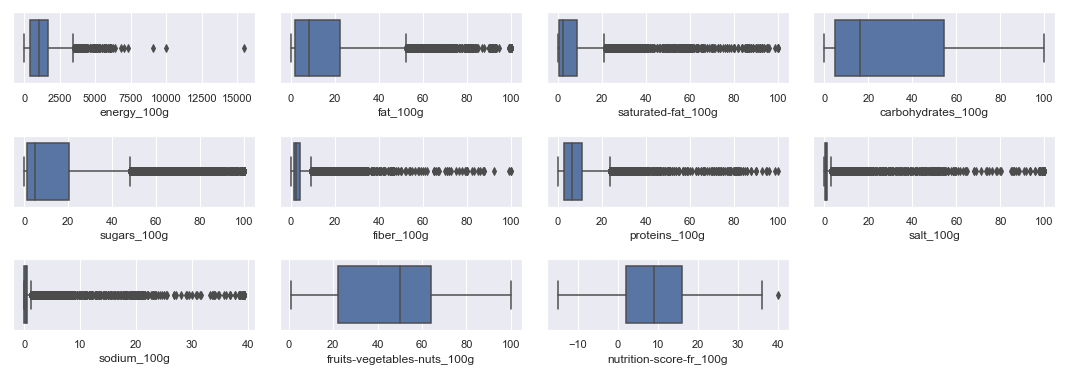

In [5]:
plt.figure(figsize=(15,10))
for i in range(15,data.shape[1]): 
    plt.subplot(6, 4, i-14)
    df = data.iloc[:,i][data.iloc[:,i]!=0] # Filtre: suppression des 0
    sns.boxplot(df)
plt.tight_layout()
plt.show()

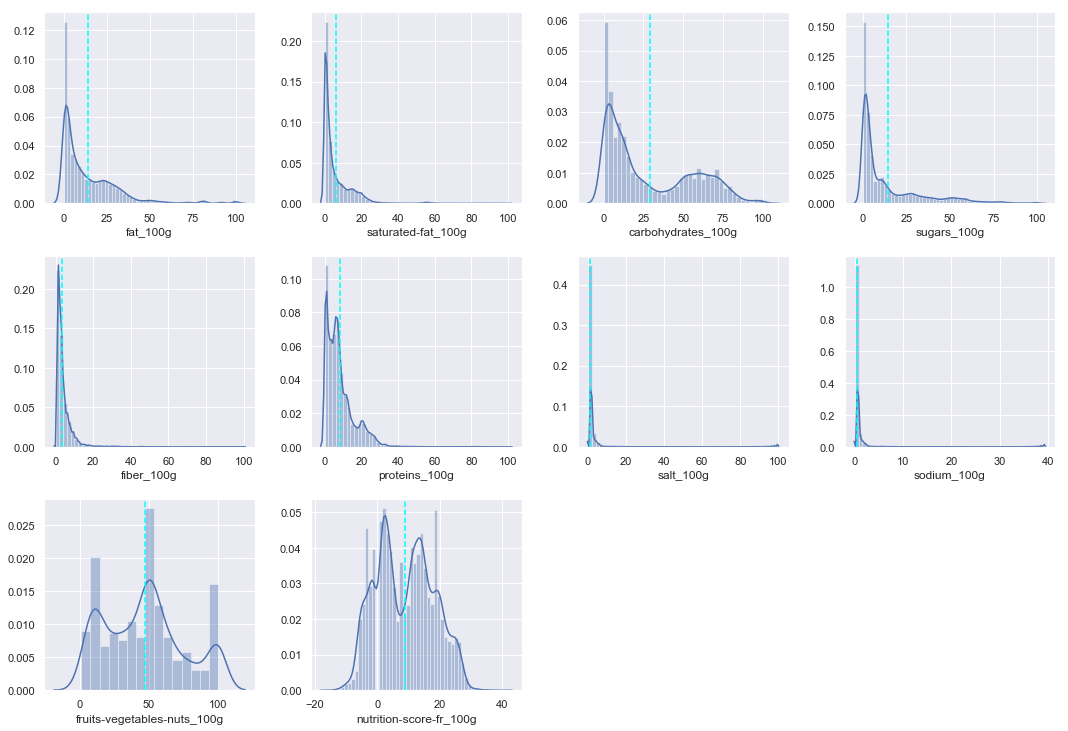

In [6]:
# nutrition_facts distributions:

plt.figure(figsize=(15,20))

for i in range(16,data.shape[1]):
    plt.subplot(6, 4, i-15)
    df = data.iloc[:,i]
    df = df[df!=0] # Filtre: suppression des 0
    sns.distplot(df)
    plt.axvline(df.mean(), color='cyan', ls='--')
plt.tight_layout()
plt.show()


In [7]:
# Mesures de forme: Kurtosis, Skewness:

df1 = data.iloc[:,15:].skew()
df1.name = 'skewness'
df2 = data.iloc[:,15:].kurtosis()
df2.name = 'kurtosis'
d = {}
for i in range(15,26):
    d[data.iloc[:,i].name]=data.iloc[:,i][data.iloc[:,i]!=0].shape[0]
df3 = pd.Series(d, name='total lines != 0')

pd.concat([df1, df2, df3], axis=1)

# Toutes les distributions sont étalées à droite, skewness > 0

# La majorité des colonnes montrent des exponentielles vers les valeurs minimums
# leur kurtosis>1 indique bien que la distribution est tres concentrée et moins aplatie que la distrib. normale

# Seul le nutrition_score et le carbohydrates ont un kurtosis <0 et montrent des distributions
# plus aplaties, on voit plusieurs modes.

,skewness,kurtosis,total lines != 0
energy_100g,0.819390,2.683782,63175
fat_100g,2.556576,8.633377,42851
saturated-fat_100g,3.575818,21.056781,53703
carbohydrates_100g,1.142625,-0.121452,44280
sugars_100g,1.948997,3.461179,57369
fiber_100g,7.672219,108.854184,31540
proteins_100g,2.224116,10.905484,59623
salt_100g,15.851539,310.362299,56253
sodium_100g,15.851333,310.354178,56251
fruits-vegetables-nuts_100g,7.530126,60.705043,1990


#### Bivariate analysis:

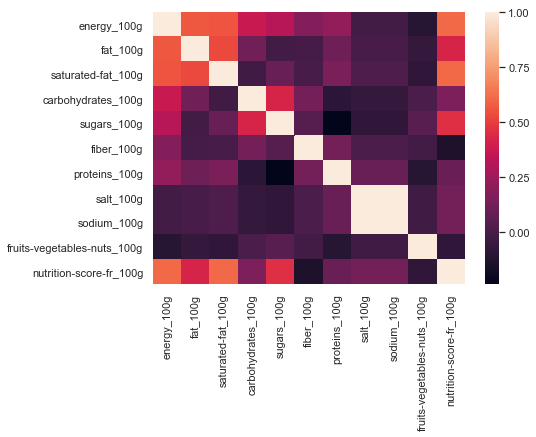

In [8]:
# Linear corelations between variables:

df = data.iloc[:,15:data.shape[1]]
plt.figure(figsize=(7,5))
sns.set()
sns.heatmap(df.corr())
plt.show() 

# We can guess variables used in the nutriscore formula calculation

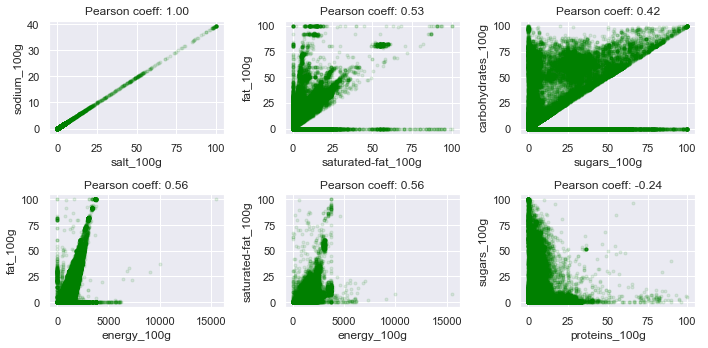

In [9]:
# Function to show scatter plot:
def bivar_show(L):
    plt.scatter(data[L[0]],
                data[L[1]], 
                marker='.',
                alpha=0.1,
                color = 'green')
    plt.xlabel(L[0])
    plt.ylabel(L[1])
    plt.title('Pearson coeff: %.2f'%data[L].corr().iloc[0,1])

plt.subplots(figsize=(10,5))

# Salt vs Sodium (obviously as Salt is parent category)
plt.subplot(2,3,1)
L1 = ['salt_100g', 'sodium_100g']
bivar_show(L1)

# Fat VS Saturated_fat: (obviously as Fat is parent category)
plt.subplot(2,3,2)
L2 = ['saturated-fat_100g', 'fat_100g']
bivar_show(L2)

# Carbohydrates VS Sugars: (obviously as Carbohydrates is parent category)
plt.subplot(2,3,3)
L3 = ['sugars_100g','carbohydrates_100g']
bivar_show(L3)

# Fat VS Saturated_fat: (obviously as Fat is parent category)
plt.subplot(2,3,4)
L4 = ['energy_100g', 'fat_100g']
bivar_show(L4)

# Fat VS Saturated_fat: (obviously as Fat is parent category)
plt.subplot(2,3,5)
L5 = ['energy_100g', 'saturated-fat_100g']
bivar_show(L5)

# Proteins VS Sugars:
plt.subplot(2,3,6)
L6 = ['proteins_100g', 'sugars_100g']
bivar_show(L6)

plt.tight_layout()
plt.show()

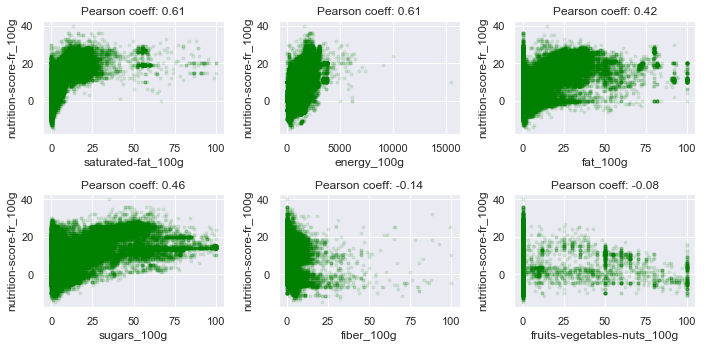

In [10]:
# Nutrition_score VS others:

L_main = [ 'saturated-fat_100g','energy_100g', 'fat_100g', 'sugars_100g',
           'fiber_100g','fruits-vegetables-nuts_100g']

plt.subplots(figsize=(10,5))

for i in range(1,len(L_main)+1):
    L = [L_main[i-1],'nutrition-score-fr_100g']
    plt.subplot(2,3,i)
    bivar_show(L)
plt.tight_layout()
plt.show()

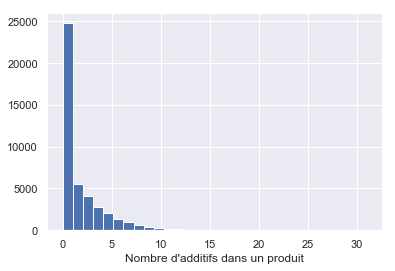

In [11]:
# Additives:

plt.hist(data['additives_n'].dropna(), bins=30)
plt.xlabel("Nombre d'additifs dans un produit")
plt.show()

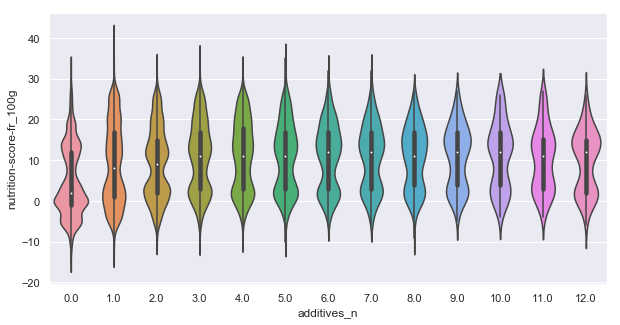

In [12]:
# Additives_No VS Nutrition_score:

plt.subplots(figsize=(10,5))
df = data[['nutrition-score-fr_100g','additives_n']].dropna()
df = df[df['additives_n']<13]
sns.violinplot(df['additives_n'],
               df['nutrition-score-fr_100g'],
               orient='v')
plt.show()

In [13]:
# Coeff. de corrélation linéaire:

df.corr(method='spearman').iloc[0,1]

# Peu d'impact linéaire mesurable avec ces données
# Et en effet, les additifs ne sont pas prit en compte dans le calcul du nutrition_score
# Mais on voit tout de meme que globalement plus un aliment a d'additifs, plus il a un
# nutrition_score mauvais, c'est probablement dû au fait que les produits ayant beaucoup d'
# additifs sont également les moins sains dans d'autres catégories

0.282051205896152

In [14]:
# Nombre d'ingrédients contenant du Palm_Oil dans 1 produit:

print(data['ingredients_from_palm_oil_n'].value_counts())
print(data['ingredients_that_may_be_from_palm_oil_n'].value_counts())

# Peu de données non nuls, surprenant pour le numero 1 de production d'huile vegetal.

0.0    40344
1.0     3283
2.0       45
Name: ingredients_from_palm_oil_n, dtype: int64
0.0    38077
1.0     4429
2.0      923
3.0      211
4.0       29
5.0        3
Name: ingredients_that_may_be_from_palm_oil_n, dtype: int64


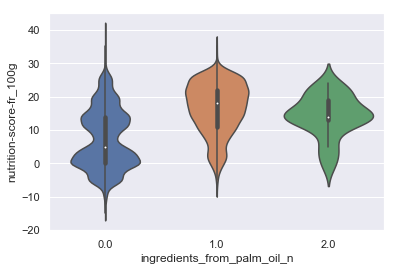

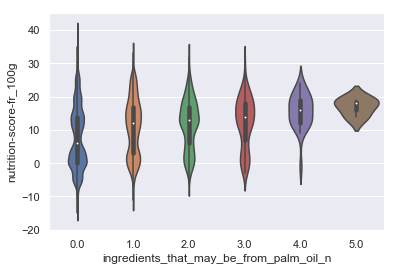

In [15]:
# Palm oil VS nutrition_score:
sns.violinplot(data['ingredients_from_palm_oil_n'], data['nutrition-score-fr_100g'])
plt.show()
sns.violinplot(data['ingredients_that_may_be_from_palm_oil_n'], data['nutrition-score-fr_100g'])
plt.show()

In [16]:
# Coeff. de corrélation linéaire:
print(data[['ingredients_from_palm_oil_n','nutrition-score-fr_100g']].corr(method='spearman').iloc[0,1])
print(data[['ingredients_that_may_be_from_palm_oil_n','nutrition-score-fr_100g']].corr(method='spearman').iloc[0,1])

# Mêmes remarques que pour les additifs

0.25529280574064595
0.13577618525575133


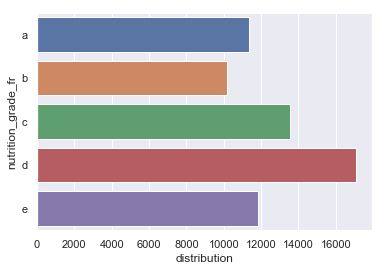

In [17]:
# Distribution des nutri-grade
df = pd.DataFrame(data['nutrition_grade_fr'].value_counts()).reset_index()
sns.barplot(x='nutrition_grade_fr', 
            y='index',
            data=df,
            order=['a','b','c','d','e'])
plt.ylabel('nutrition_grade_fr')
plt.xlabel('distribution')
plt.show()

# distribution homogène entre les 5 catégories

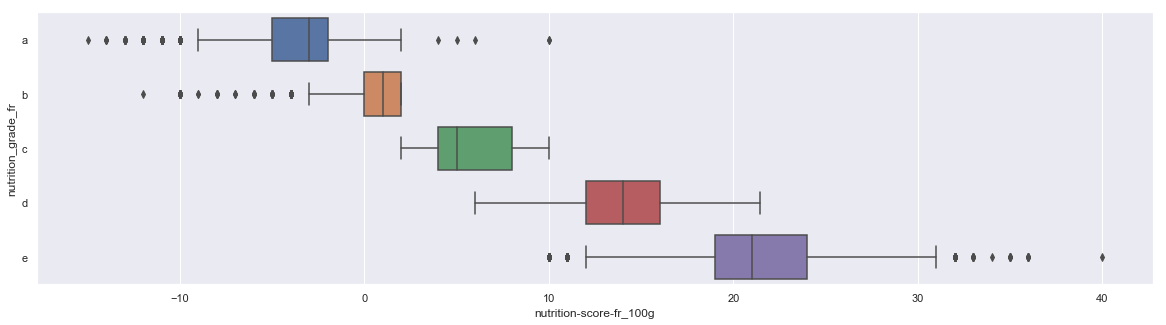

In [18]:
# As expected, nutri-grade VS nutri-score:
df = data[['nutrition_grade_fr', 'nutrition-score-fr_100g']]
plt.subplots(figsize=(20,5))
sns.boxplot(x='nutrition-score-fr_100g',
            y='nutrition_grade_fr', 
            data=df,
            order=['a','b','c','d','e'])
plt.show()

# cela dit on voit quelques outliers en A au meme niveau que des E

In [19]:
# Outliers 'malsains' A :
data[['product_name','nutrition-score-fr_100g']][data['nutrition_grade_fr']=='a'].sort_values('nutrition-score-fr_100g', ascending=False).head()

# Ces outliers son des eaux ! Ce qui s'explique.
# La formule d'openfoodfact donne directement un grade A aux eaux peu importe le nutri-score.

,product_name,nutrition-score-fr_100g
306261,Agua Mineral Natural,10.0
192056,Evian,10.0
304683,Courmayeur,6.0
249676,Agua mineral natural,5.0
220374,Sémillante arômes naturels Citron,4.0


In [20]:
# Outliers 'sains' E :
data[['product_name','nutrition-score-fr_100g']][data['nutrition_grade_fr']=='e'].sort_values('nutrition-score-fr_100g', ascending=True).head()

# Ce sont des boissons, ce qui explique pouruqoi ce sont des outliers.
# Les boissons ont un calcul spécial qui est plus dur que pour les aliments solides. 
# Aliment solide est E si nutri_score > 18
# Boisson est E si nutri_score > 9

,product_name,nutrition-score-fr_100g
251991,Limonade Fraise Des Bois,10.0
212895,Pur jus raisin,10.0
200535,Cola,10.0
222480,Smoothie carotte pomme-thé vert,10.0
191388,Ricqles Menthe,10.0


In [21]:
# Top 'pnns groups' containing most lines:

L1 = list(data['pnns_groups_1'].dropna().value_counts().index[1:12])
L2 = list(data['pnns_groups_2'].dropna().value_counts().index[1:25])

In [22]:
#Moyenne du nutri_score par groupe: pnns_groups_1

df = data[['nutrition-score-fr_100g', 'pnns_groups_1']].dropna()[data['pnns_groups_1'].isin(L1)]
df1 = df.groupby('pnns_groups_1').agg('mean').sort_values('nutrition-score-fr_100g')
L1_order = list(df1.index)
df1

,nutrition-score-fr_100g
pnns_groups_1,
Fruits and vegetables,-2.595844
Cereals and potatoes,1.200999
Composite foods,3.390529
Beverages,7.659552
Milk and dairy products,7.731098
Unknown,8.695548
Fish meat eggs,8.899388
Fat and sauces,11.845887
Salty snacks,12.775401


In [23]:
#Moyenne du nutri_score par groupe: pnns_groups_2

df = data[['nutrition-score-fr_100g', 'pnns_groups_2']].dropna()[data['pnns_groups_2'].isin(L2)]
df2 = df.groupby('pnns_groups_2').agg('mean').sort_values('nutrition-score-fr_100g')
L2_order = list(df2.index)
df2

,nutrition-score-fr_100g
pnns_groups_2,
Vegetables,-4.372814
Fruits,-2.451485
Legumes,-2.292035
Cereals,-0.908958
One-dish meals,2.282410
Milk and yogurt,2.793384
Bread,3.007105
Fruit juices,3.904866
Meat,4.626506


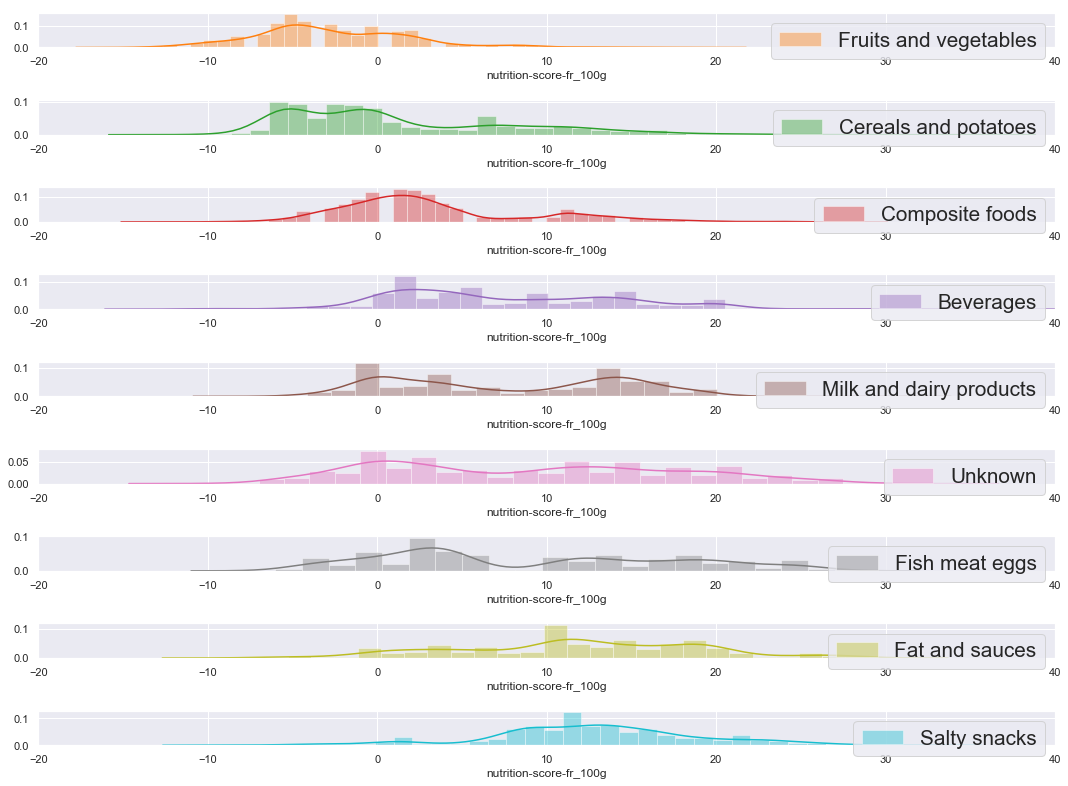

In [24]:
# Distribution du nutri_score par groupe:

df = data[['nutrition-score-fr_100g', 'pnns_groups_1']].dropna()[data['pnns_groups_1'].isin(L1_order)]
plt.figure(figsize=(15,30))

for i in range(1,len(L1_order)+1):
    plt.subplot(25, 1, i)
    df2 = df['nutrition-score-fr_100g'][df['pnns_groups_1']==L1_order[i-1]]
    sns.distplot(df2, label=L1_order[i-1], color=plt.cm.tab10(i/len(L1_order)))
    plt.legend(loc='upper right', fontsize='xx-large')
    plt.xlim([-20,40])

plt.tight_layout()
# import warnings
# warnings.filterwarnings("ignore")
plt.show()

# Note: A "one dish-meal" means balanced meal that consists of dietary-fibre, water and nutrients 
#       such as carbohydrates, proteins, fats, vitamins and minerals in one dish.

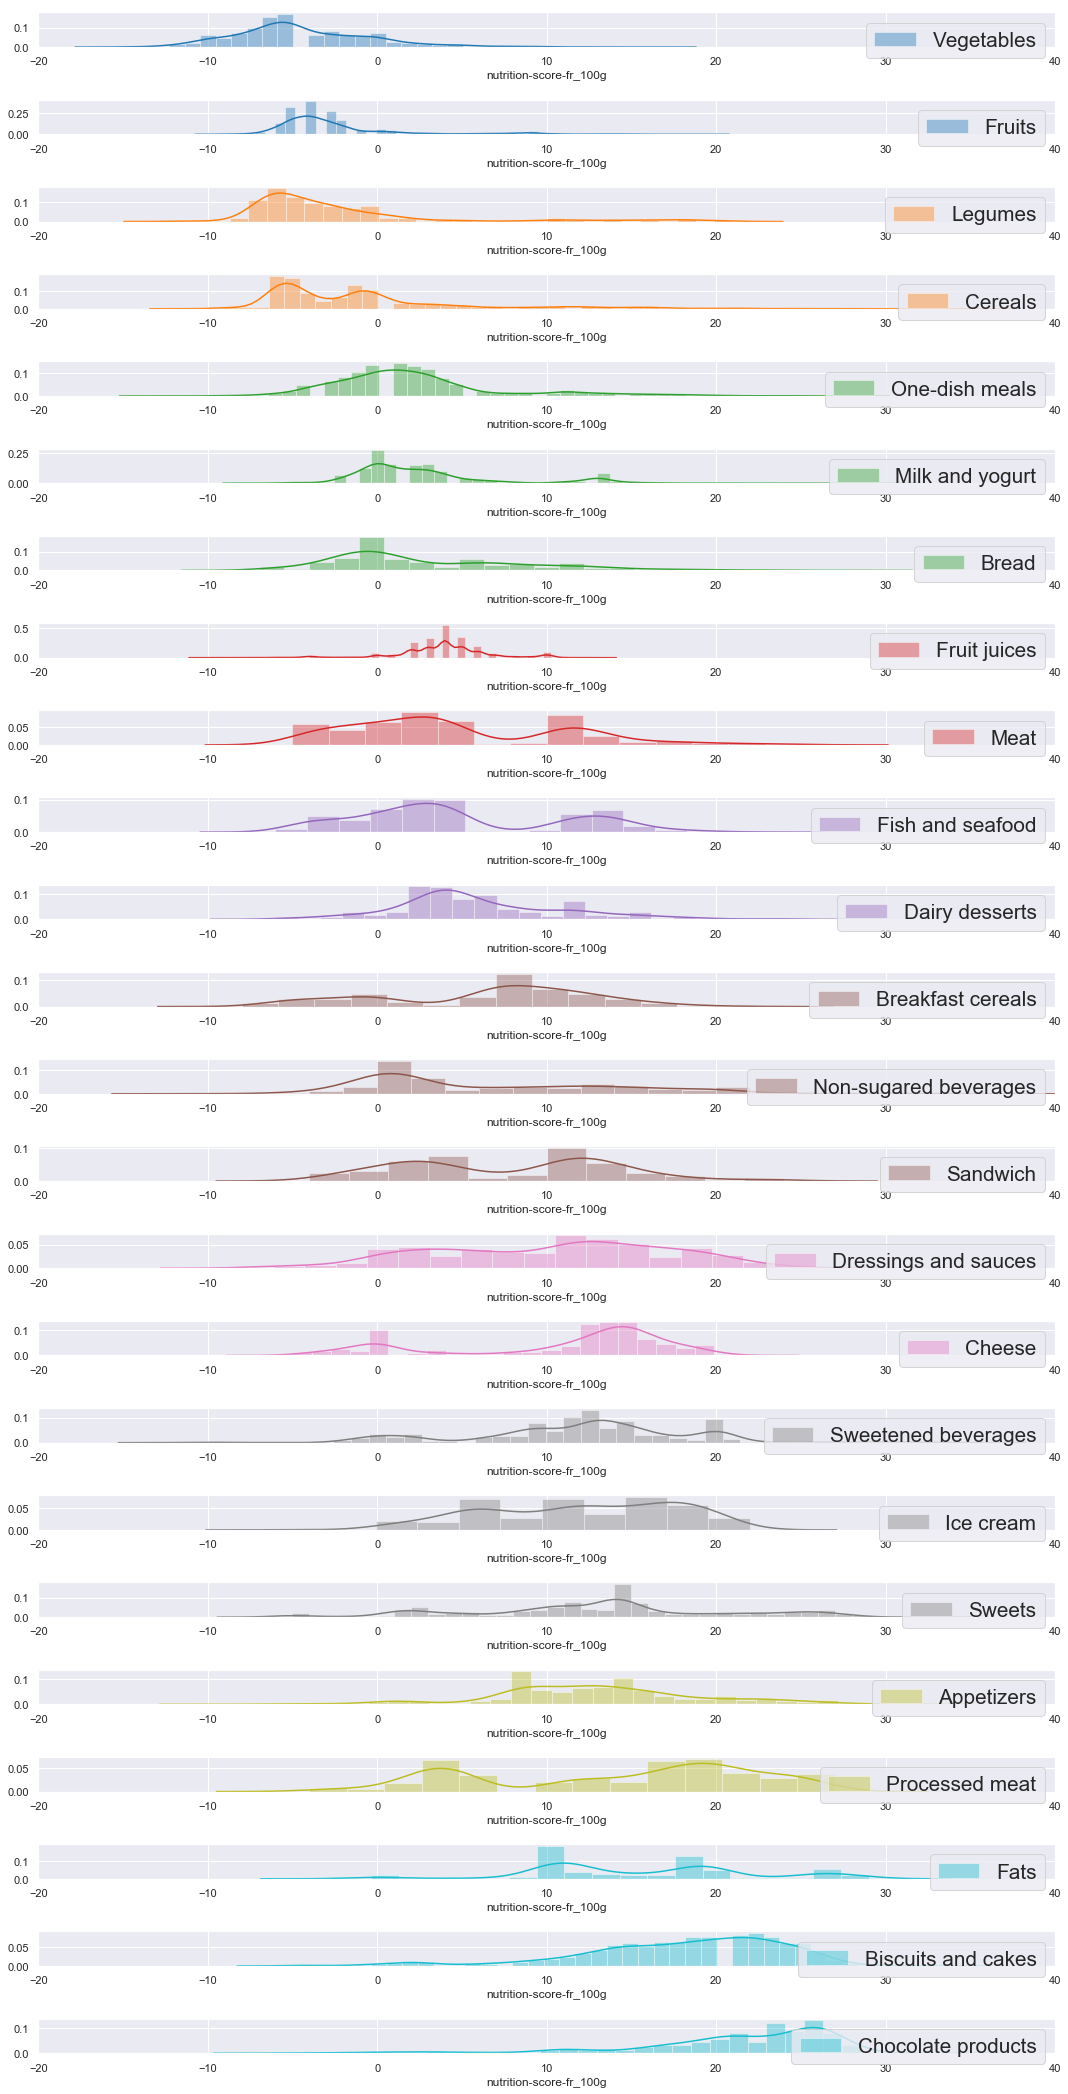

In [27]:
# Distribution du nutri_score par groupe:

df = data[['nutrition-score-fr_100g', 'pnns_groups_2']].dropna()[data['pnns_groups_2'].isin(L2_order)]
plt.figure(figsize=(15,30))

for i in range(1,len(L2_order)+1):
    plt.subplot(25, 1, i)
    df2 = df['nutrition-score-fr_100g'][df['pnns_groups_2']==L2_order[i-1]]
    sns.distplot(df2, label=L2_order[i-1], color=plt.cm.tab10(i/len(L2_order)))
    plt.legend(loc='upper right', fontsize='xx-large')
    plt.xlim([-20,40])

plt.tight_layout()
import warnings
warnings.filterwarnings("ignore")
plt.show()

# Note: A "one dish-meal" means balanced meal that consists of dietary-fibre, water and nutrients 
#       such as carbohydrates, proteins, fats, vitamins and minerals in one dish.

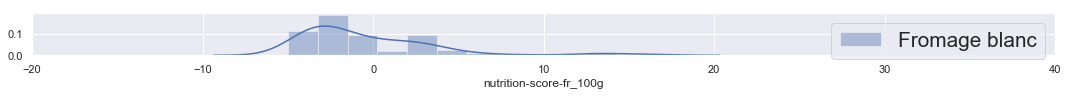

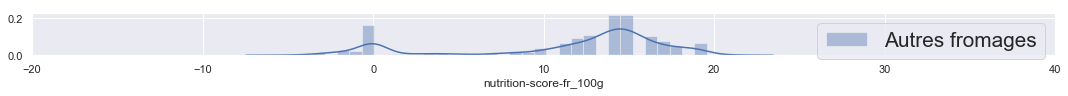

In [29]:
# les distributions multimodales s'expliquent par differentes sous-categories regroupées ensembles.

# Ex: distribution bimodale du fromage s'explique à priori parcequ'on a dans cette categorie
# des fromages blancs et des fromages traditionels ayant nutri_score plus mauvais.

df1 = data[['nutrition-score-fr_100g','pnns_groups_2','product_name']][data['pnns_groups_2']=='Cheese']
df2 = df1[df1['product_name'].str.lower().str.contains('blanc')]
df1 = df1.drop(list(df2.index), axis='index')

plt.figure(figsize=(15,1.5))
sns.distplot(df2['nutrition-score-fr_100g'], label='Fromage blanc')
plt.legend(loc='upper right', fontsize='xx-large')
plt.xlim([-20,40])
plt.tight_layout()
plt.show()

plt.figure(figsize=(15,1.5))
sns.distplot(df1['nutrition-score-fr_100g'], label='Autres fromages')
plt.legend(loc='upper right', fontsize='xx-large')
plt.xlim([-20,40])
plt.tight_layout()
plt.show()


#### Statisic test

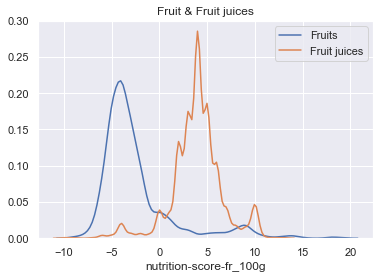

Fruit variance: 15.851459635557276
Fruit juices variance: 7.455332412896288

t-test: p-value =  1.1406171051838952e-279


In [30]:

# indépendance des 2 moyennes: T-test: Fruits VS Jus de fruits
# Peut-on affirmer qu'en moyenne les fruits sont significativement plus sains que les jus de fruits?

import scipy.stats as st

df_fr = data['nutrition-score-fr_100g'][data['pnns_groups_2']=='Fruits']
df_ju = data['nutrition-score-fr_100g'][data['pnns_groups_2']=='Fruit juices']

sns.distplot(df_fr, hist=False, label='Fruits')
sns.distplot(df_ju, hist=False, label='Fruit juices')
plt.title('Fruit & Fruit juices')
plt.show()


# Test's conditions:
#    (les échantillons suivent une loi quelconque)
#    les échantillons compte plus de 50 individus
#    les variances des 2 populations sont comparables (rapport 1 à 3)
print('Fruit variance:',df_fr.var())
print('Fruit juices variance:',df_ju.var())

#  H0: no significative difference between the mean of the the 2 categories. u1 = u2
#  H1: statisticative significant difference between the mean of the the 2 categories. u1 < u2 
t, p = st.ttest_ind(df_fr, df_ju, equal_var=False)
print('\nt-test: p-value = ',p)

In [31]:
# p-value < 5%, l'hypothèse nulle est rejetée
# On peut affirmer que les produits 'Fruits' sont plus sains que 'Jus de fruits' car
# ils ont un score nutritionel plus faible en moyenne.
# Avec une chance très très faible de se tromper ici.

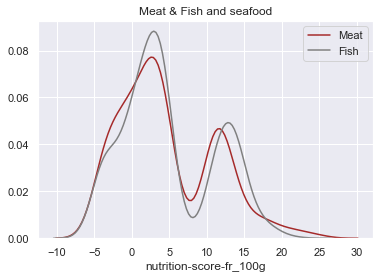

Meat variance: 40.10486683576396
Fish ans seafood variance: 37.69386897281061

t-test: p-value =  0.4911766485873108


In [32]:
# Test statistique: 

# indépendance des 2 moyennes: T-test: Viandes Vs Poissons
# Peut-on affirmer qu'en moyenne le poisson est significativement plus sain que la viande?

import scipy.stats as st

df_meat = data['nutrition-score-fr_100g'][data['pnns_groups_2']=='Meat']
df_fish = data['nutrition-score-fr_100g'][data['pnns_groups_2']=='Fish and seafood']

sns.distplot(df_meat, hist=False, label='Meat', color='brown')
sns.distplot(df_fish, hist=False, label='Fish', color='grey')
plt.title('Meat & Fish and seafood')
plt.show()


# Test's conditions:
#    (les échantillons suivent une loi quelconque)
#    les échantillons compte plus de 50 individus
#    les variances des 2 populations sont comparables (rapport 1 à 3)
print('Meat variance:',df_meat.var())
print('Fish ans seafood variance:',df_fish.var())

#  H0: no significative difference between the mean of the the 2 categories. u1 = u2
#  H1: statisticative significant difference between the mean of the the 2 categories. u1 < u2 
t, p = st.ttest_ind(df_meat, df_fish, equal_var=False)
print('\nt-test: p-value = ',p)

In [33]:
# p-value > 5%, on ne peut pas rejeter l'hypothèse nulle
# On ne peut pas dire qu'une catégorie a en moyenne un meilleur score nutritionel que l'autre.

#### PCA features visualisation

In [34]:
# Pour la visualisation de la variance portée par nos variables
# Ainsi que pour voir si le nutri-score repose sur quelques variables ou groupe de variables.

df = data.iloc[:,15:data.shape[1]]
X = df.values  #Matrice à n observations et p variables
n = data.shape[0]
p = data.shape[1]

#CENTRAGE & REDUCTION des données: Centering & scaling
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X) #Calcul des moyennes et ecart-types
X_std = std_scale.transform(X) #Matrice centrée réduite

# PCA : Calcul des valeurs propres et composantes principales:
from sklearn import decomposition
pca = decomposition.PCA(n_components=0.8)
pca.fit(X_std)
print("Taux de variance portée par chaque axe:",[np.round(x,2) for x in pca.explained_variance_ratio_])
print("\nTaux de variance totale expliqué par ces %.0f axes: "%len(pca.explained_variance_ratio_),
      round(pca.explained_variance_ratio_.sum(),2) )


Taux de variance portée par chaque axe: [0.26, 0.19, 0.14, 0.11, 0.09, 0.07]

Taux de variance totale expliqué par ces 6 axes:  0.86


In [35]:
# Vecteurs propres:
eigen_vectors = pca.components_.T
P = pd.DataFrame(eigen_vectors, columns=["CP%d"%i for i in range(1,7)], index=df.columns)
P

,CP1,CP2,CP3,CP4,CP5,CP6
energy_100g,0.515321,-0.058941,-0.018817,0.186800,0.049606,-0.005369
fat_100g,0.406175,0.009192,-0.261384,-0.076486,0.162293,-0.475657
saturated-fat_100g,0.444876,0.037146,-0.264504,-0.179958,0.111691,-0.096664
carbohydrates_100g,0.208655,-0.193617,0.463884,0.319480,-0.064959,-0.045465
sugars_100g,0.251436,-0.208695,0.560634,-0.049507,-0.114654,0.284269
fiber_100g,0.034955,-0.019290,0.035562,0.761369,0.225651,-0.260992
proteins_100g,0.111433,0.180421,-0.425317,0.379054,0.055813,0.716642
salt_100g,0.039066,0.661021,0.229689,0.013438,0.015554,-0.059661
sodium_100g,0.039067,0.661021,0.229690,0.013438,0.015554,-0.059660
fruits-vegetables-nuts_100g,-0.085807,-0.065847,0.193269,-0.183615,0.939242,0.166173


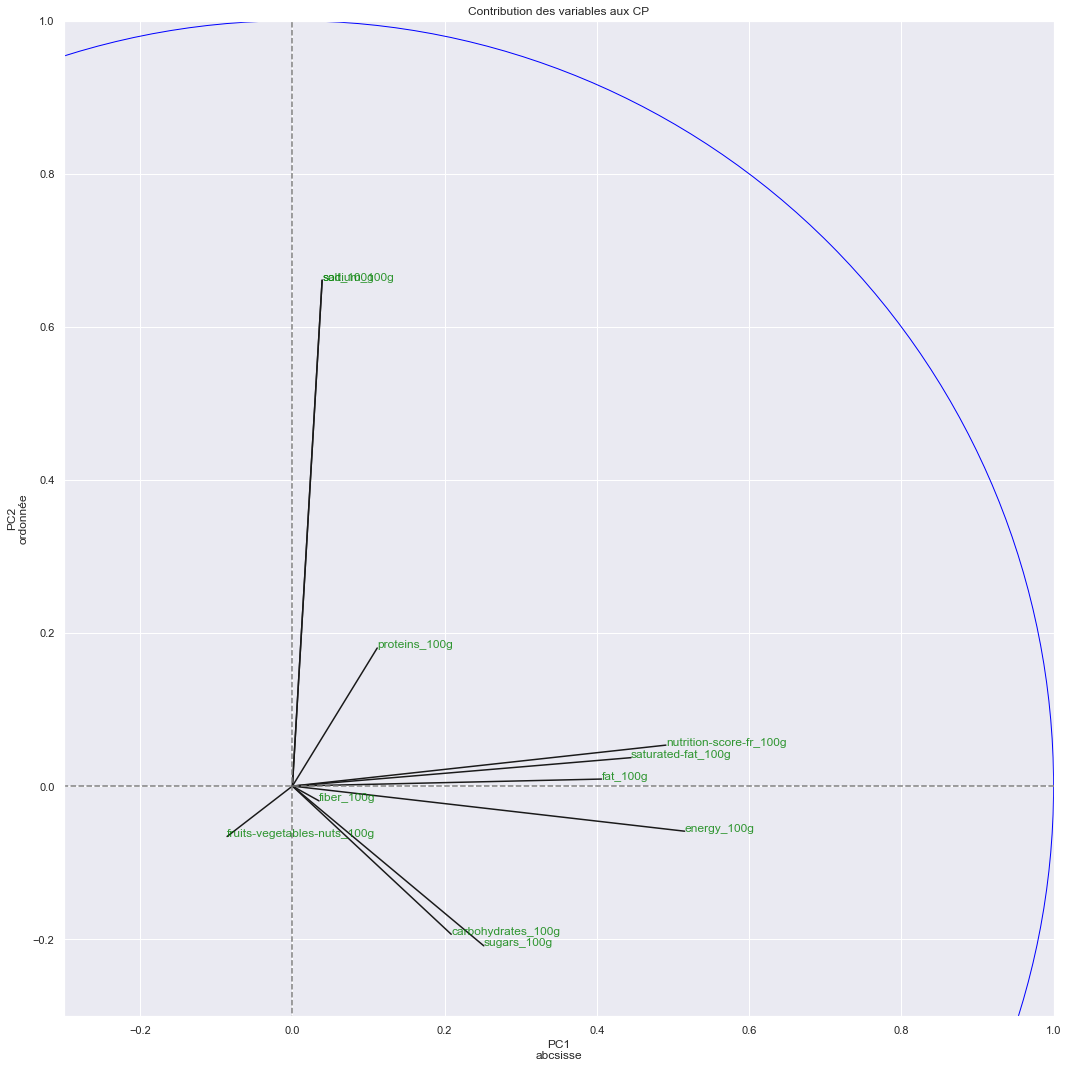

In [36]:
#PCA: cercle de corrélation: CP1 et CP2
fig, ax = plt.subplots(figsize=(15,15))

for i, (x, y) in enumerate(zip(P.iloc[:,0], P.iloc[:,1])):
    # Afficher un segment de l'origine au point (x, y) en noir
    plt.plot([0, x], [0, y], c='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, P.index[i], color='green', alpha=0.8)

plt.plot([-1,1],[0,0], c='grey', linestyle='--') #Droite du 2eme axe PC2
plt.plot([0,0],[-1,1], c='grey', ls='--') #Droite du 1er axe PC1

cercle = plt.Circle((0,0),1,color='blue', fill=False) # Ajout du cercle de rayon 1
ax.add_artist(cercle)                                 # On ne peut interptéter que les 
                                                      # variables proche de 1
ax.set_xlim([-0.3, 1])
ax.set_ylim([-0.3, 1])
ax.set_ylabel("PC2\nordonnée")
ax.set_xlabel("PC1\nabcsisse")
ax.set_title("Contribution des variables aux CP")
plt.tight_layout()
plt.show()

In [37]:
# Le nutrition_score s'apparente beaucoup à la 1ère composante (corrélation 0.49 entre les 2)

# On devine que les variables contribuant à un nutrition_score fort sont:
#    - en priorité saturated_fat, fat et energy, 
#    - ainsi que les carbohydrates (dont les sucres) et les protéines
# Variables contrbuant à un nutrition_score faible:
#    - les 'fruits-vegetables-nuts'
# Variables n'ayant pas l'air de contribuer au nutrition_score (axe perpendiculaire):
#    - le sel

# MAIS: 
# - la variance portée par ces 2 axes ne représente que 45% de la variance totale
# - certaines variables sont loin du cercle de corrélation de rayon 1, donc peu interprétables.


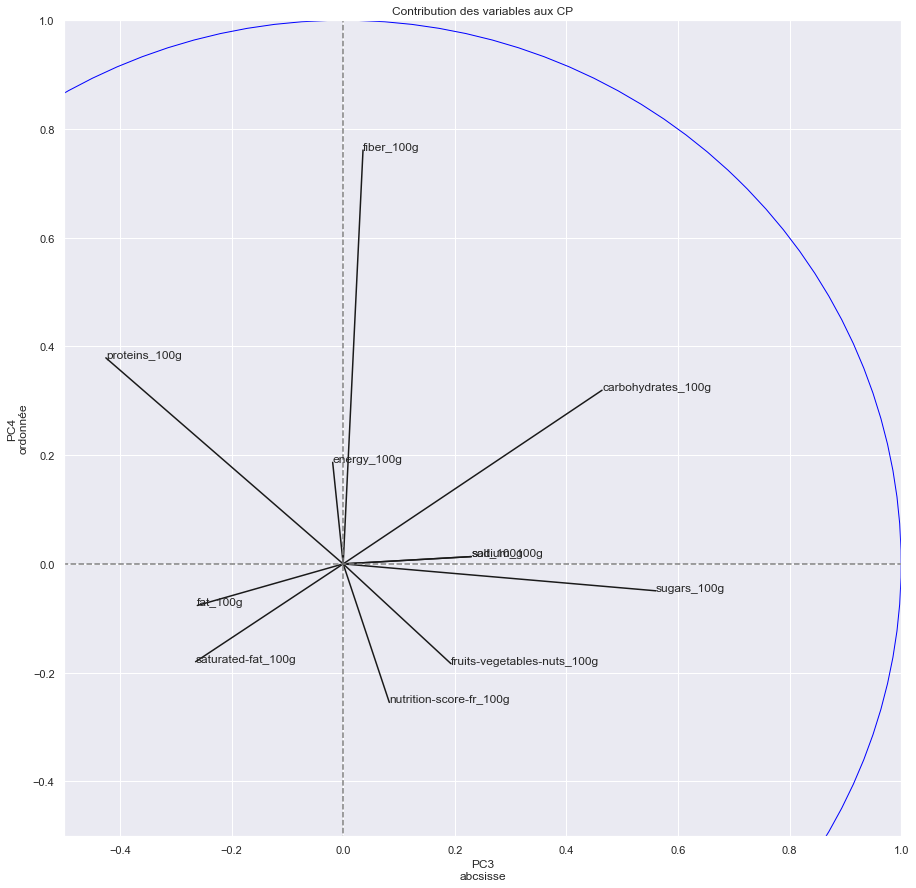

In [38]:
#PCA: cercle de corrélation: CP3 et CP4
fig, ax = plt.subplots(figsize=(15,15))

for i, (x, y) in enumerate(zip(P.iloc[:,2], P.iloc[:,3])):
    # Afficher un segment de l'origine au point (x, y) en noir
    plt.plot([0, x], [0, y], c='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, P.index[i])

plt.plot([-1,1],[0,0], c='grey', linestyle='--') #Droite du 2eme axe PC2
plt.plot([0,0],[-1,1], c='grey', ls='--') #Droite du 1er axe PC1

cercle = plt.Circle((0,0),1,color='blue', fill=False) # Ajout du cercle de rayon 1
ax.add_artist(cercle)                                 # On ne peut interptéter que les 
                                                      # variables proche de 1
ax.set_xlim([-0.5, 1])
ax.set_ylim([-0.5, 1])
ax.set_ylabel("PC4\nordonnée")
ax.set_xlabel("PC3\nabcsisse")
ax.set_title("Contribution des variables aux CP")
plt.show()

In [39]:
# PC3 a l'air de porter les glucides (carbohydrates, sucres)
# PC4 a l'air de porter les fibres

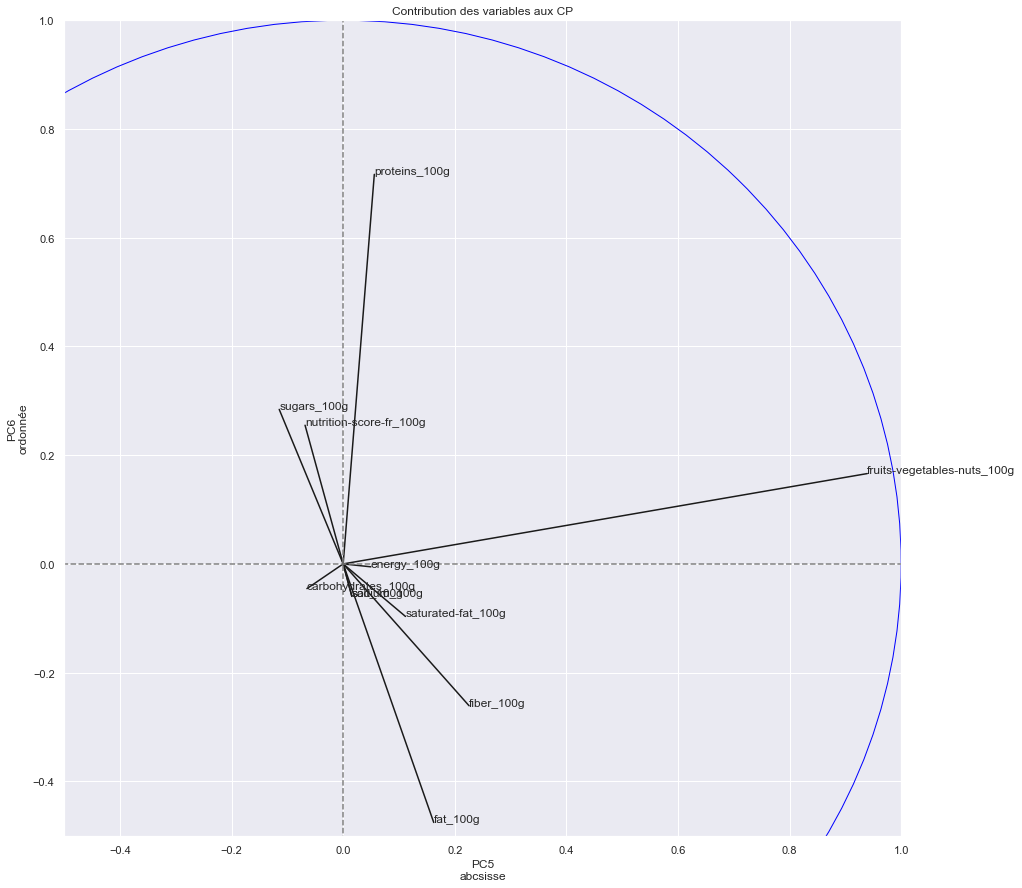

In [40]:
#PCA: cercle de corrélation: CP5 et CP6
fig, ax = plt.subplots(figsize=(15,15))

for i, (x, y) in enumerate(zip(P.iloc[:,4], P.iloc[:,5])):
    # Afficher un segment de l'origine au point (x, y) en noir
    plt.plot([0, x], [0, y], c='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, P.index[i])

plt.plot([-1,1],[0,0], c='grey', linestyle='--') #Droite du 2eme axe PC2
plt.plot([0,0],[-1,1], c='grey', ls='--') #Droite du 1er axe PC1

cercle = plt.Circle((0,0),1,color='blue', fill=False) # Ajout du cercle de rayon 1
ax.add_artist(cercle)                                 # On ne peut interptéter que les 
                                                      # variables proche de 1
ax.set_xlim([-0.5, 1])
ax.set_ylim([-0.5, 1])
ax.set_ylabel("PC6\nordonnée")
ax.set_xlabel("PC5\nabcsisse")
ax.set_title("Contribution des variables aux CP")
plt.show()

In [41]:
# PC5 a l'air de porter les fruits-vegetables-nuts
# PC6 a l'air de porter les protéines et une partie des lipides: fat_100g